<a href="https://colab.research.google.com/github/amitsinghh1/demand_forecasting/blob/main/demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import openpyxl
import io
import requests


In [27]:
url = 'https://raw.githubusercontent.com/amitsinghh1/demand_forecasting/main/SKU%20Order%20trend.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
df.head()

,Row Labels,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,2004420104,2004420101,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
0,10-03-2023,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11-03-2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12-03-2023,2,5,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13-03-2023,1,5,0,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14-03-2023,3,3,0,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['Row Labels', '2000090102', '2000040102', '2000700102', '2011850102',
       '2004420103', '2004420102', '2000090104', '2004420104', '2004420101',
       ...
       '2000280203', '2000430202', '2003970106', '2000450202', '2004010102',
       '2000740103', '2004030106', '2000740203', '2000740204', '2000380103'],
      dtype='object', length=1191)

In [7]:
import matplotlib.pyplot as plt

In [29]:
df['Row Labels']=pd.to_datetime(df['Row Labels'],format="%d-%m-%Y")

In [30]:
df1=df.set_index('Row Labels')

In [31]:
df1.head()

,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,2004420104,2004420101,2011850101,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
Row Labels,,,,,,,,,,,,,,,,,,,,,
2023-03-10,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-12,2,5,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-13,1,5,0,0,1,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-14,3,3,0,0,0,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Row Labels'>

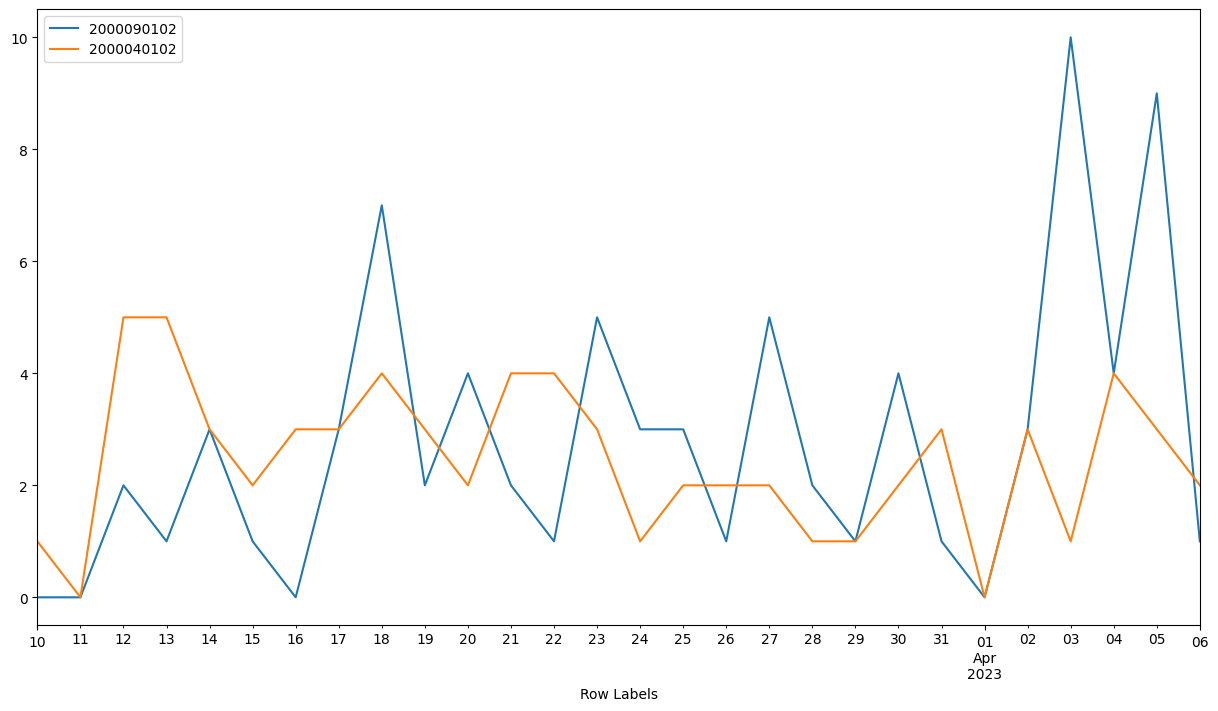

In [32]:
df1.iloc[:,:2].plot(figsize=[15,8])

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)